In [ ]:
import socket
hostname=socket.gethostname()
ip=socket.gethostbyname(hostname)

In [ ]:
with socket.socket(socket.AF_INET,socket.SOCK_STREAM)as s:
    s.bind(("localhost",0))
    a,port=s.getsockname()
print(hostname,"\n",ip,"\n",a,"\n",port)

In [ ]:
%%writefile server_tcp.py
import socket
host=socket.gethostname()
port=2000
Addr=(host,port)
server_socket=socket.socket()
server_socket.bind(Addr)
server_socket.listen()
conn,addr=server_socket.accept()
print("Connection from: ",str(addr))
while True:
    data=conn.recv(1024).decode()
    if not data:
        break
    print(data)
    data=input("-->")
    conn.send(data.encode())
conn.close()

In [ ]:
%%writefile client_tcp.py
import socket
host=socket.gethostname()
port=2000
Addr=(host,port)
client_socket=socket.socket()
client_socket.connect(Addr)
msg=input("-->")
while msg!="":
    client_socket.send(msg.encode())
    data=client_socket.recv(1024).decode()
    print("Recived from server--> ",data)
    msg=input("-->")
client_socket.close()

In [ ]:
from socket import*
def createServer():
    server_socket=socket()
    server_socket.bind(("localhost",9050))
    server_socket.listen()
    while 1:
        (clientsocket,addr)=server_socket.accept()
        rd=clientsocket.recv(5000).decode()
        print(rd)
        data="""HTTP/1.1 200 OK\nContent-Type:text/html;charset=utf-8\n\n<html><body><h1>Hello World</h1></body></html>\n\n"""
        clientsocket.send(data.encode())
    server_socket.close()
print("Access http://localhost")
createServer()

In [ ]:
# Program for udp server client connection 

In [ ]:
%%writefile udp_server.py
import socket
host=""
port=5000
udp_server=socket.socket(type=socket.SOCK_DGRAM)
udp_server.bind((host,port))
while True:
    print("Waiting for message")
    data,addr=udp_server.recvfrom(1024)
    print("recived",data,"from",addr)
    msg=input("Enter msg: ")
    udp_server.sendto(msg.encode(),addr)
udp_server.close()

In [ ]:
%%writefile udp_client.py
import socket
host="192.168.104.69"
port=5000
udp_client=socket.socket(type=socket.SOCK_DGRAM)
while True:
    data=input("Enter data to send: ")
    if not data:
        break
    udp_client.sendto(data.encode(),(host,port))
    print("Ready to Recive data")
    data,addr=udp_client.recvfrom(1024)
    if not data:
        break
    print("Recived ",data.decode())
udp_clinet.close()

In [ ]:
# API

In [ ]:
import requests,json
# city=input("Enter city name: ")
api_key="da9ad70ad246fb38295619d0cbd56710"
city='Ahmedabad'
url=f"http://api.openweathermap.org/geo/1.0/direct?q={city}&appid={api_key}"
url1=f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}"
response=requests.get(url)
coord=response.json()
print(coord)
lat=coord[0]['lat']
long=coord[0]['lon']
print("lattitude: ",lat)
print("longitude: ",long)

In [ ]:
import requests,json
api_key="da9ad70ad246fb38295619d0cbd56710"
city='Ahmedabad'
url1=f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={long}&appid={api_key}"
response=requests.get(url1)
current_wether=response.json()
print(current_wether)
description=current_wether['weather'][0]['description']
temp=current_wether['main']['temp']
pressure=current_wether['main']['pressure']
humidity=current_wether['main']['humidity']
speed=current_wether['wind']['speed']
visibility=current_wether['visibility']
print(temp)
print(pressure)
print(humidity)
print(speed)
print(visibility)

In [ ]:
import requests,json
api_key="da9ad70ad246fb38295619d0cbd56710"
city='Ahmedabad'
url2=f"http://api.openweathermap.org/data/2.5/air_pollution?lat={lat}&lon={long}&appid={api_key}"
response=requests.get(url2)
current_air=response.json()
print(current_air)
idex=current_air['list'][0]['main']['aqi']
print(idex)

In [ ]:
import requests,json
import pandas as pd
api_key="da9ad70ad246fb38295619d0cbd56710"
city='Ahmedabad'
url3=f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={long}&appid={api_key}"
response = requests.get(url3)
five_day=response.json()
print(json.dumps(five_day,indent=5))
D = {"date_time":[], "temp":[], "pressure":[], "humidity":[], "weather":[]}
for i in five_day['list']:
    D["date_time"].append(i["dt_txt"])
    D["temp"].append(i["main"]["temp"])
    D["pressure"].append(i["main"]["temp"])
    D["humidity"].append(i["main"]["humidity"])
    D["weather"].append(i["weather"][0]["description"])
import pandas as pd
df = pd.DataFrame(D)
df.head(40)

In [ ]:
import requests
from bs4 import BeautifulSoup
url4=f"http://SubSlikescript.com/movie/Titanic-120338"
response = requests.get(url4)
cont=response.text
soup=BeautifulSoup(cont,"html.parser")
print(soup.prettify())

In [ ]:
soup.find("h1").text.strip()

In [ ]:
soup.find("p").text.strip()

In [ ]:
stript=soup.find("div",class_="full-script").text.strip()
print(stript)

In [ ]:
import requests
from bs4 import BeautifulSoup
url5=f"https://indianexpress.com/latest-news/"
response = requests.get(url5)
cont=response.text
soup=BeautifulSoup(cont,"html.parser")
print(soup.prettify())

In [ ]:
news=soup.findAll('div',{'class':'top-news'})
for i in news:
    h=i.findAll('a')
    for j in h:
        headline=j.get_text()
        print(headline)
        print(j.get('href'))

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url="https://www.politifact.com/factchecks/?_gl=1"
response=requests.get(url)
soup=BeautifulSoup(response.text,"html.parser")
print(soup.prettify())
frame=[]
li=soup.find_all("li",class_="o-listicle__item")
for i in li:
    statement=i.find("div",class_="m-statement__quote").text.strip()
    link="https://www.politifact.com"
    link+=i.find("div",class_="m-statement__quote").find("a")["href"].strip()
    date=i.find("div",class_="m-statement__body").find("footer").text[-15:-1].strip()
    source=i.find("a",class_="m-statement__name").text.strip()
    frame.append((statement,link,date,source))
Data=pd.DataFrame(frame,columns=["statement","link","date","source"])
print(Data)

<!DOCTYPE html>
<html dir="ltr" lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Fact-checks | PolitiFact
  </title>
  <meta content="PolitiFact is a fact-checking website that rates the accuracy of claims by elected officials and others on its Truth-O-Meter." name="description">
   <meta content="all" name="robots">
    <meta content="PolitiFact" name="publisher"/>
    <meta content="PolitiFact" name="twitter:username">
     <meta content="summary" name="twitter:card">
      <meta content="PolitiFact" name="twitter:site"/>
      <meta content="" name="twitter:url">
       <meta content="" name="twitter:title"/>
       <meta content="PolitiFact is a fact-checking website that rates the accuracy of claims by elected officials and others on its Truth-O-Meter." name="twitter:description"/>
       <meta content="vrxxsw8mwnf2pxgnwxvgsn4g93w3vm" name="f

<!DOCTYPE html>
<html class="ep-theme-spark" lang="en">
 <head>
  <!-- s: no | l: no -->
  <base __cpgenerated="1" href="https://www.cars.com/shopping/results/?stock_type=cpo&amp;makes%5B%5D=mercedes_benz&amp;models%5B%5D=&amp;list_price_max=&amp;maximum_distance=20&amp;zip="/>
  <!-- CP_UI_TAG -->
  <script __cpp="1">
   window.__Cpn = window.__Cpn ? window.__Cpn : function () { this.permalink = this.URI('https://stealthsurfer.online/__cpi.php?s=Q05rb0oxUjA5WmtybzZ6LzBIOGt0bEJaZzJBN0svUXVhRElWSTBoRXNFenVlUFFpa01YN25NY1Z6blNqb1lYVU5KajgrSDVzZXNTTGY3OTc2cWRXMmZVemIzS0M5RFp6U015QnIvT21VUFk9&r=aHR0cHM6Ly9zdGVhbHRoc3VyZmVyLm9ubGluZS9zaG9wcGluZy9yZXN1bHRzLz9zdG9ja190eXBlPWNwbyZtYWtlcyU1QiU1RD1tZXJjZWRlc19iZW56Jm1vZGVscyU1QiU1RD0mbGlzdF9wcmljZV9tYXg9Jm1heGltdW1fZGlzdGFuY2U9MjAmemlwPSZfX2Nwbz1hSFIwY0hNNkx5OTNkM2N1WTJGeWN5NWpiMjA%3D&__cpo=1'); this.modal = '<style __cpp="1"> #__cpsModal #__cpsModalContent { background: url("") repeat !important; } #__cpsModal { display: none; position: fixed !
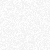
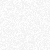
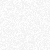

In [2]:
file_path="Certified used Mercedes-Benz for sale.html"
file=open(file_path,encoding="utf-8")
response=file.read()
soup=BeautifulSoup(response,"html.parser")
print(soup.prettify())

In [3]:
import numpy as np
frame=[]
li=soup.find_all("div",class_="vehicle-details")
for i in li:
    car_name=i.find("h2",class_="title").text.strip()
    milage=i.find("div",class_="mileage").text.strip()
    Dealer_name=i.find("div",class_="dealer-name").text.strip()
    try:
        Rating=i.find("span",class_="sds-rating__count").text.strip()
    except:
        Rating=np.nan
    Reviews=i.find("span",class_="sds-rating__link").text.strip()
    price=i.find("span",class_="primary-price").text.strip()
    frame.append((car_name,milage,Dealer_name,Rating,Reviews,price))
Data=pd.DataFrame(frame,columns=["car_name","mileage","Dealer_name","Rating","Reviews","price"])
Data

,car_name,mileage,Dealer_name,Rating,Reviews,price
0,2020 Mercedes-Benz CLA 250 Base 4MATIC,"28,744 mi.",Mercedes-Benz of Lynnwood,4.4,(130 reviews),"$35,995"
1,2019 Mercedes-Benz AMG GT 53 Base,"25,771 mi.",International Autos,4.0,(117 reviews),"$79,995"
2,2021 Mercedes-Benz AMG GLE 53 Base,"22,374 mi.",John Sisson Motors,2.8,(38 reviews),"$80,923"
3,2022 Mercedes-Benz AMG CLA 45 Base 4MATIC,"10,595 mi.",Mercedes-Benz of Santa Rosa,NaN,(30 reviews),"$56,633"
4,2021 Mercedes-Benz AMG GLE 53 Base,"33,622 mi.",Mercedes-Benz of Rochester,4.7,(152 reviews),"$76,995"
5,2021 Mercedes-Benz E-Class E 450 4MATIC,"12,477 mi.",Benzel-Busch Motor Car,4.5,"(5,283 reviews)","$76,532"
6,2021 Mercedes-Benz AMG GLE 63 S-Model 4MATIC,"22,383 mi.",Mercedes-Benz of Lancaster,4.8,(174 reviews),"$102,990"
7,2019 Mercedes-Benz S-Class S 560,"49,332 mi.",Mercedes-Benz of Ontario,4.8,"(2,016 reviews)","$54,580"
8,2021 Mercedes-Benz AMG GLE 53 Base,"37,688 mi.",John Sisson Motors,2.8,(38 reviews),"$76,715"
9,2021 Mercedes-Benz GLA 250 Base,"19,521 mi.",Mercedes-Benz of Augusta,4.6,(264 reviews),"$34,999"


In [4]:
file_path="30 Most Popular Movies Right Now_ What to Watch In Theaters and Streaming __ Rotten Tomatoes – Movie and TV News.html"
file=open(file_path,encoding="utf-8")
response=file.read()
soup=BeautifulSoup(response,"html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html class="hitim" lang="en-US">
 <head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <!-- OneTrust Cookies Consent Notice start for rottentomatoes.com -->
  <script charset="UTF-8" crossorigin="anonymous" data-domain-script="7e979733-6841-4fce-9182-515fac69187f" integrity="sha384-WEHwEli88wqOiQd913F1utFZiwisa8XhCkbjLnbKEpFa/WbFcPKeGg7h4fdsv0Z/" src="https://cdn.cookielaw.org/consent/7e979733-6841-4fce-9182-515fac69187f/otSDKStub.js" type="text/javascript">
  </script>
  <script type="text/javascript">
   function OptanonWrapper() { }
  </script>
  <!-- OneTrust Cookies Consent Notice end for rottentomatoes.com -->
  <!-- OneTrust IAB US Privacy (USP) -->
  <script ccpa-opt-out-geo="US" ccpa-opt-out-ids="dummy" ccpa-opt-out-lspa="false" charset="UTF-8" src="https://cdn.cookielaw.org/opt-out/otCCPAiab.js" type="text/javascript">
  </script>
  <!-- OneTrus

In [31]:
import numpy as np
frame=[]
li=soup.find_all("div",class_="row countdown-item")
for i in li:
    movie_name=i.find("h2").text[0:-3].strip()
    try:
        Rating=i.find("span",class_="tMeterScore").text.strip()
    except:
        Rating=np.nan
    frame.append((movie_name,Rating))
Data=pd.DataFrame(frame,columns=["movie_name","Rating"])
Data

,movie_name,Rating
0,Transformers: Rise of the Beasts (2023),53%
1,Spider-Man: Across the Spider-Verse (2023),96%
2,The Little Mermaid (2023),67%
3,The Boogeyman (2023),63%
4,"Are You There God? It's Me, Margaret. (2023)",99%
5,Fast X (2023),56%
6,BlackBerry (2023),98%
7,The Machine (2023),27%
8,Reality (2023),92%
9,Flamin' Hot (2023),68%
